In [1]:
#Bismillohi rahmoni rahim 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from fastai.vision.all import*
from ipywidgets import widgets

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = Path('/kaggle/input/pnevmoniya/train')
fls = get_image_files(path)
fls

(#5216) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1180_virus_2010.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1230_virus_2081.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1513_virus_2632.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person124_virus_238.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person746_virus_1369.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person588_bacteria_2422.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person466_virus_960.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person1590_bacteria_4175.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person399_bacteria_1805.jpeg'),Path('/kaggle/input/pnevmoniya/train/PNEUMONIA/person59_bacteria_279.jpeg')...]

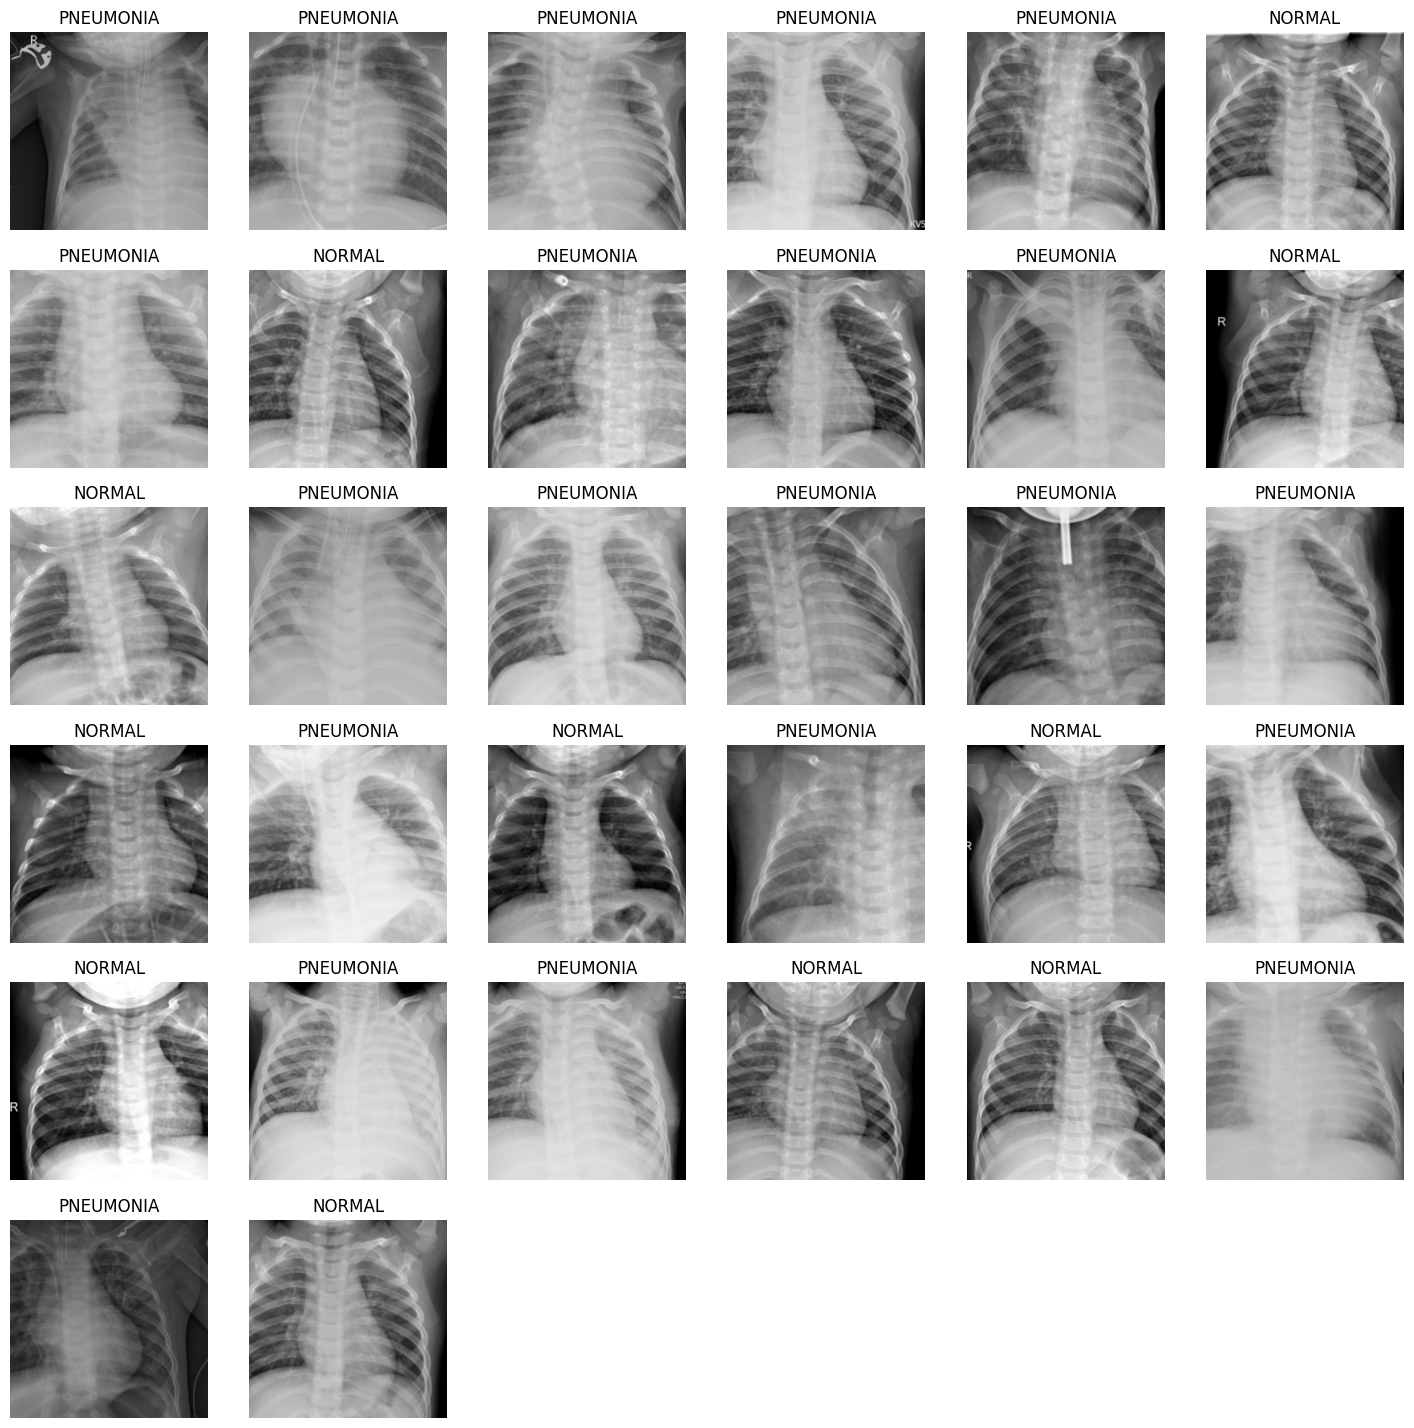

In [3]:
illnes = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct=0.2, seed=42),
get_y= parent_label,
item_tfms=Resize(224)
)

dls = illnes.dataloaders(path)
dls.train.show_batch(max_n=32, nrows=6)

In [4]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.441656,0.253637,0.925216,01:43


epoch,train_loss,valid_loss,accuracy,time
0,0.157264,0.130502,0.968360,01:34
1,0.088076,0.043324,0.984660,01:35


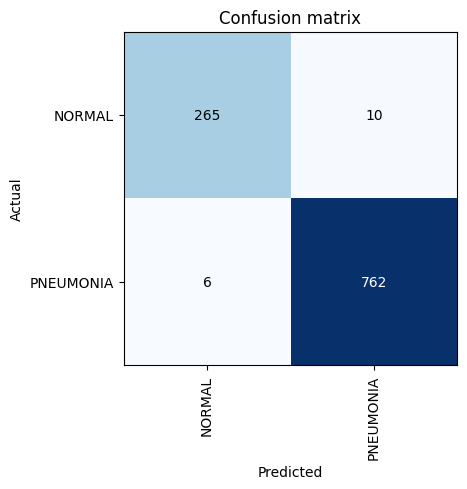

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

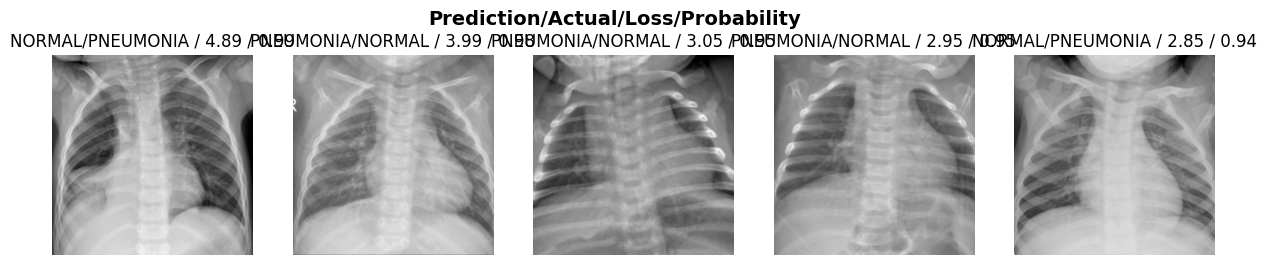

In [6]:
interp.plot_top_losses(5, nrows=1)

In [7]:
interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.98      0.96      0.97       275
   PNEUMONIA       0.99      0.99      0.99       768

    accuracy                           0.98      1043
   macro avg       0.98      0.98      0.98      1043
weighted avg       0.98      0.98      0.98      1043



In [8]:
learn.export('pneumonia123.pkl')

In [9]:
example = pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv')

In [10]:
example

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [11]:
for i in range(len(example)):
    label = example.loc[i, 'id']
    img = PILImage.create(Path(f"/kaggle/input/pnevmoniya/test/{label}"))
    pred, pred_id, probs = learn.predict(img)
    example.loc[i, 'labels'] = np.array(probs[1])

In [12]:
example.to_csv("example.csv", index=False)


In [13]:
pd.read_csv("/kaggle/working/example.csv")

,id,labels
0,test_img_10001.jpeg,0.999842
1,test_img_10002.jpeg,0.878912
2,test_img_10003.jpeg,0.028585
3,test_img_10004.jpeg,0.999370
4,test_img_10005.jpeg,0.000522
...,...,...
619,test_img_10620.jpeg,0.997701
620,test_img_10621.jpeg,0.105067
621,test_img_10622.jpeg,0.999097
622,test_img_10623.jpeg,0.988840
